In [1]:
%matplotlib inline



# Reading an event file


Read events from a file. For a more detailed guide on how to read events
using MNE-Python, see `tut_epoching_and_averaging`.



In [4]:
# Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#          Chris Holdgraf <choldgraf@berkeley.edu>
#
# License: BSD (3-clause)

import matplotlib.pyplot as plt
import mne
from mne.datasets import sample

print(__doc__)

data_path = sample.data_path()
fname = data_path + '/MEG/sample/sample_audvis_raw-eve.fif'

Automatically created module for IPython interactive environment


Reading events
--------------

Below we'll read in an events file. We suggest that this file end in
``-eve.fif``. Note that we can read in the entire events file, or only
events corresponding to particular event types with the ``include`` and
``exclude`` parameters.



In [5]:
events_1 = mne.read_events(fname, include=1)
events_1_2 = mne.read_events(fname, include=[1, 2])
events_not_4_32 = mne.read_events(fname, exclude=[4, 32])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/arasdar/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-eve.fif'

Events objects are essentially numpy arrays with three columns:
``event_sample | previous_event_id | event_id``



In [8]:
print(events_1[:5], '\n\n---\n\n', events_1_2[:5], '\n\n')

for ind, before, after in events_1[:]:
    print("At sample %d stim channel went from %d to %d"
          % (ind, before, after))

[[28771     0     1]
 [30450     0     1]
 [32101     0     1]
 [33712     0     1]
 [35428     0     1]] 

---

 [[27977     0     2]
 [28771     0     1]
 [29652     0     2]
 [30450     0     1]
 [31240     0     2]] 


At sample 28771 stim channel went from 0 to 1
At sample 30450 stim channel went from 0 to 1
At sample 32101 stim channel went from 0 to 1
At sample 33712 stim channel went from 0 to 1
At sample 35428 stim channel went from 0 to 1
At sample 37007 stim channel went from 0 to 1
At sample 38711 stim channel went from 0 to 1
At sample 40405 stim channel went from 0 to 1
At sample 42126 stim channel went from 0 to 1
At sample 43781 stim channel went from 0 to 1
At sample 45486 stim channel went from 0 to 1
At sample 47095 stim channel went from 0 to 1
At sample 48722 stim channel went from 0 to 1
At sample 50269 stim channel went from 0 to 1
At sample 51881 stim channel went from 0 to 1
At sample 53494 stim channel went from 0 to 1
At sample 55100 stim channel went from 0 

Plotting events
---------------

We can also plot events in order to visualize how events occur over the
course of our recording session. Below we'll plot our three event types
to see which ones were included.



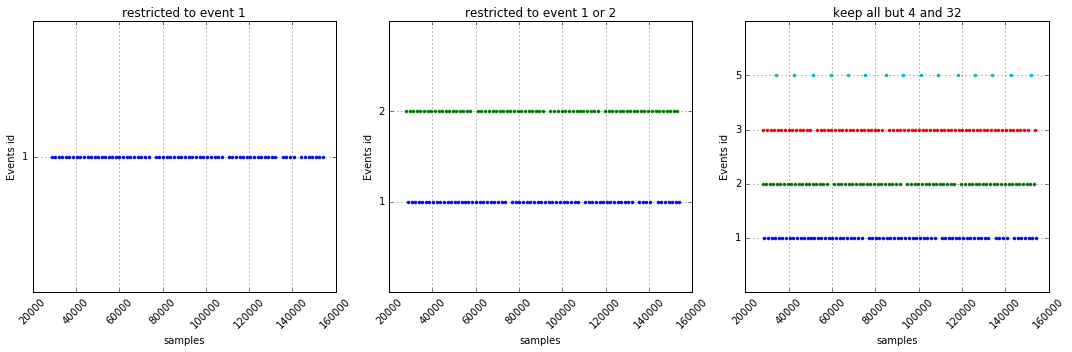

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

mne.viz.plot_events(events_1, axes=axs[0], show=False)
axs[0].set(title="restricted to event 1")

mne.viz.plot_events(events_1_2, axes=axs[1], show=False)
axs[1].set(title="restricted to event 1 or 2")

mne.viz.plot_events(events_not_4_32, axes=axs[2], show=False)
axs[2].set(title="keep all but 4 and 32")
plt.setp([ax.get_xticklabels() for ax in axs], rotation=45)
plt.tight_layout()
plt.show()

Writing events
--------------

Finally, we can write events to disk. Remember to use the naming convention
``-eve.fif`` for your file.



In [6]:
mne.write_events('example-eve.fif', events_1)